## Read and examine a dataset and classify variables by their type: quantitative vs. categorical

### o   Handle categorical variables with numerically coded values

### o   Perform univariate and bivariate analysis and derive meaningful insights about the dataset

### o   Identify and treat missing values and remove dataset outliers

### o   Build a correlation matrix to identify relevant variables ( Graph )


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [2]:
data=pd.read_csv(r'C:\Users\user\Desktop\Training\ML Classifier\DataSet\BreastCancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe() # Decribe the data to chech the statitcal  cvalues

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Check missing value by heatmap

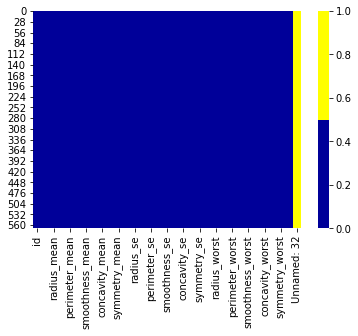

In [5]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours)) 

In [6]:
# Drop column unnamed:32 because all values are null
data.drop(['Unnamed: 32','id'],inplace=True,axis=1)

In [7]:
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Handle categorical variables with numerically coded values

In [8]:
x=data.diagnosis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data.loc[data['diagnosis']=='M','diagnosis']=1.0
data.loc[data['diagnosis']=='B','diagnosis']=0.0
data.diagnosis=data.diagnosis.astype('float64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Remove  coumns having low relation

In [11]:
corr=data.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Drop the columns having low correlation with the Diagnosis Column of data

In [12]:
data.drop(corr[corr.diagnosis<.66].index,axis=1,inplace=True) 

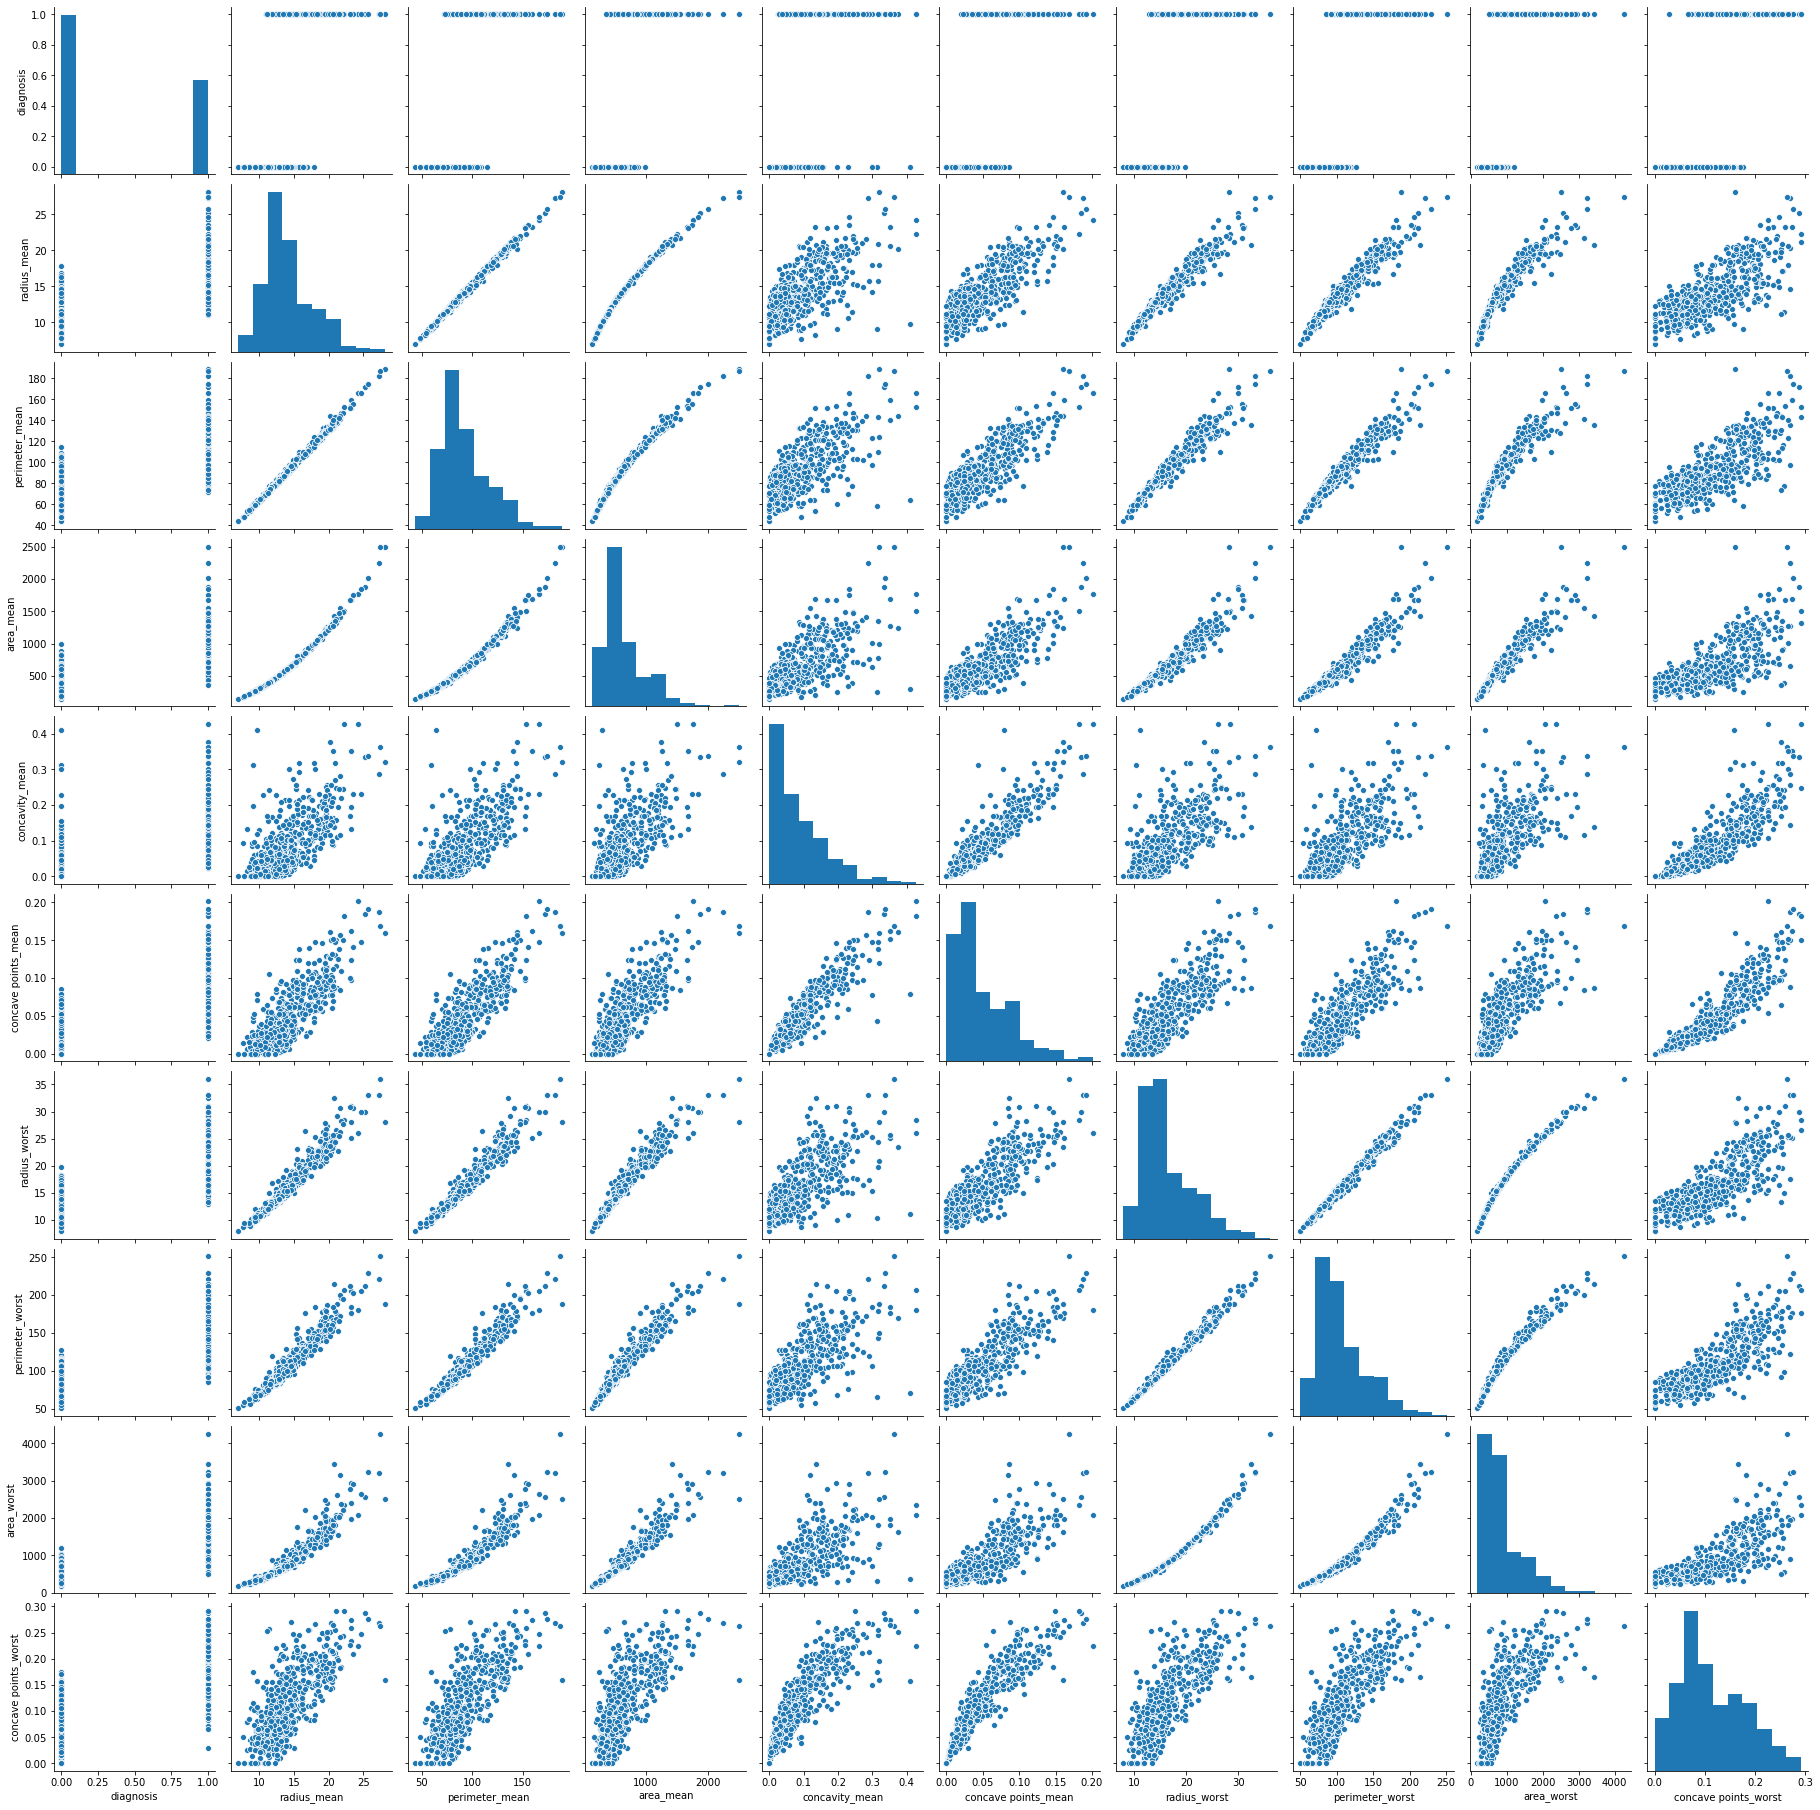

In [13]:
sns.pairplot(data) 

In [14]:
data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1.0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.2654
1,1.0,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.1860
2,1.0,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.2430
3,1.0,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.2575
4,1.0,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.1625


In [15]:
corr=data.corr()
corr

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
diagnosis,1.000000,0.730029,0.742636,0.708984,0.696360,0.776614,0.776454,0.782914,0.733825,0.793566
radius_mean,0.730029,1.000000,0.997855,0.987357,0.676764,0.822529,0.969539,0.965137,0.941082,0.744214
perimeter_mean,0.742636,0.997855,1.000000,0.986507,0.716136,0.850977,0.969476,0.970387,0.941550,0.771241
area_mean,0.708984,0.987357,0.986507,1.000000,0.685983,0.823269,0.962746,0.959120,0.959213,0.722017
concavity_mean,0.696360,0.676764,0.716136,0.685983,1.000000,0.921391,0.688236,0.729565,0.675987,0.861323
concave points_mean,0.776614,0.822529,0.850977,0.823269,0.921391,1.000000,0.830318,0.855923,0.809630,0.910155
radius_worst,0.776454,0.969539,0.969476,0.962746,0.688236,0.830318,1.000000,0.993708,0.984015,0.787424
perimeter_worst,0.782914,0.965137,0.970387,0.959120,0.729565,0.855923,0.993708,1.000000,0.977578,0.816322
area_worst,0.733825,0.941082,0.941550,0.959213,0.675987,0.809630,0.984015,0.977578,1.000000,0.747419
concave points_worst,0.793566,0.744214,0.771241,0.722017,0.861323,0.910155,0.787424,0.816322,0.747419,1.000000


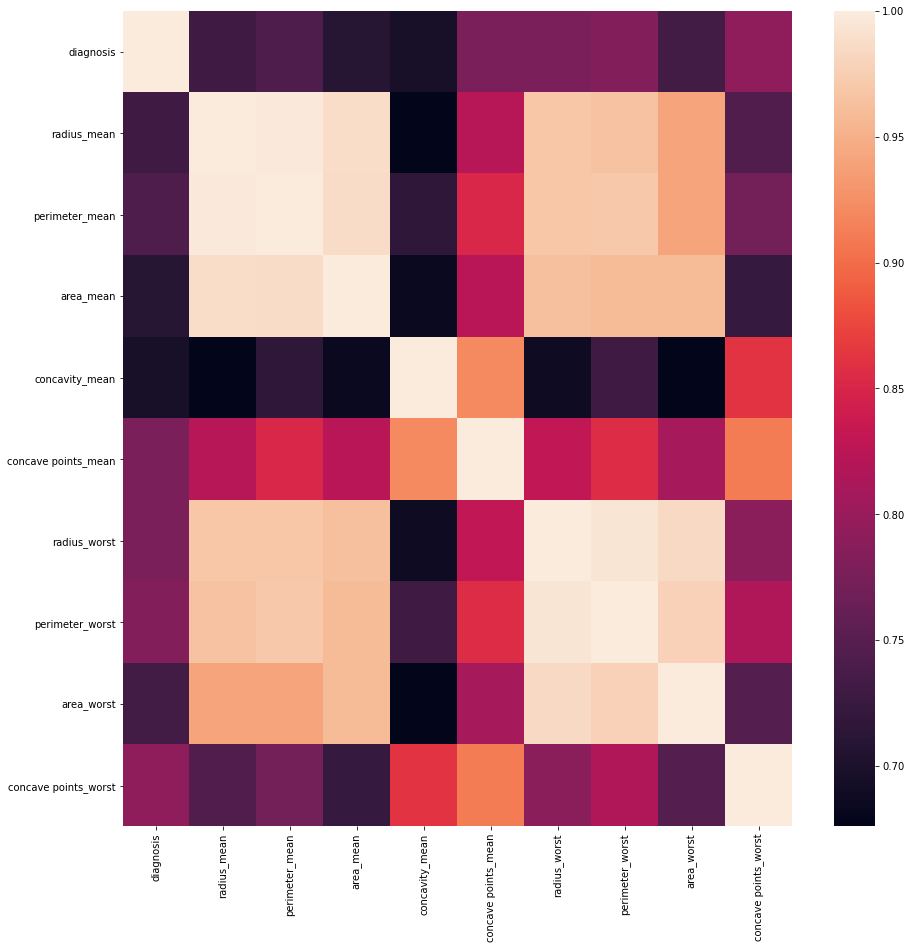

In [16]:
# graphically plotting correlation
plt.subplots(figsize=(15,15))
sns.heatmap(corr)

#  Perform univariate and bivariate analysis and derive meaningful insights about the dataset

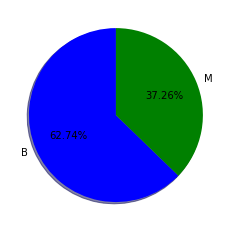

In [17]:
plt.pie(data['diagnosis'].value_counts(),labels=['B','M'],autopct='%1.02f%%',shadow=True,colors=['blue','green'],startangle=90)
plt.show()


In [18]:
data['diagnosis'].value_counts()
columns=data.columns
columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')

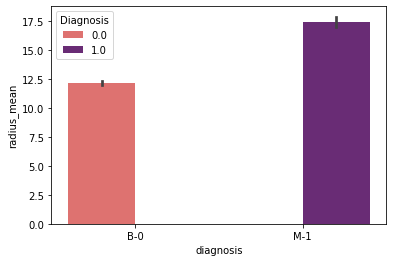

In [19]:
sns.barplot(data.diagnosis,data.radius_mean,hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()


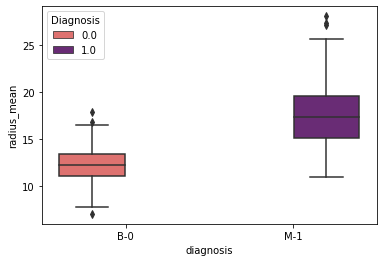

In [20]:
sns.boxplot(data.diagnosis,data.radius_mean,hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()

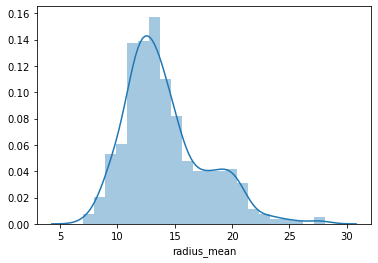

In [21]:
sns.distplot(data.radius_mean) #Plotting the distribution graph 
plt.show()


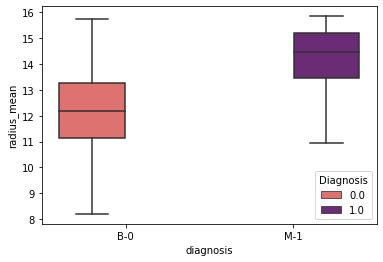

In [22]:
## Removing the outliers
data=data[data['radius_mean']<=16.0]
data=data[data['radius_mean']>=8.0]
sns.boxplot(data.diagnosis,data.radius_mean,hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()

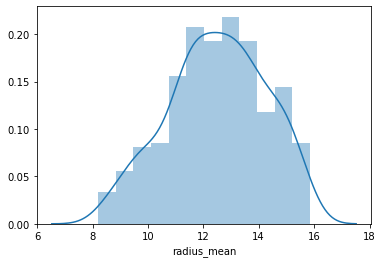

In [23]:
sns.distplot(data.radius_mean) #  #Plotting the distribution graph 
plt.show()

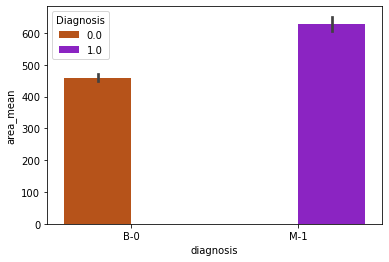

In [24]:
sns.barplot(data.diagnosis,data.area_mean,hue=data.diagnosis,palette='gnuplot_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()

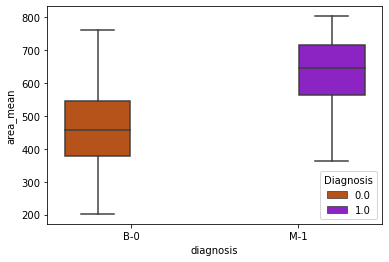

In [25]:
# Checking the outliers
sns.boxplot(data.diagnosis,data.area_mean,hue=data.diagnosis,palette='gnuplot_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()

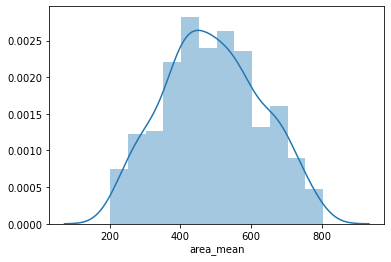

In [26]:
sns.distplot(data.area_mean)  #Plotting the distribution graph 
plt.show()

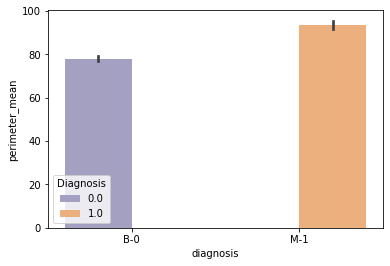

In [27]:
sns.barplot(data.diagnosis,data.perimeter_mean,hue=data.diagnosis,palette='tab20c_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B-0',"M-1"])
plt.show()

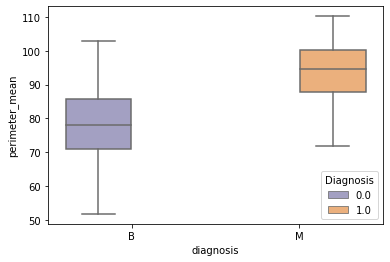

In [28]:
sns.boxplot(data.diagnosis,data.perimeter_mean,hue=data.diagnosis,palette='tab20c_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

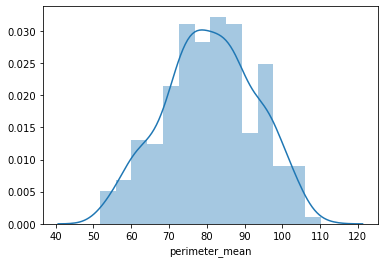

In [29]:
sns.distplot(data.perimeter_mean)
plt.show()

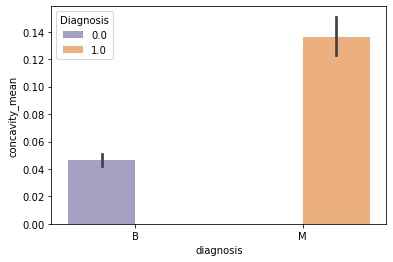

In [30]:
sns.barplot(data.diagnosis,data.concavity_mean,hue=data.diagnosis,palette='tab20c_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

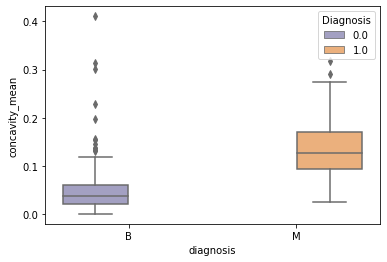

In [31]:
# Checking the outlies
sns.boxplot(data.diagnosis,data.concavity_mean,hue=data.diagnosis,palette='tab20c_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

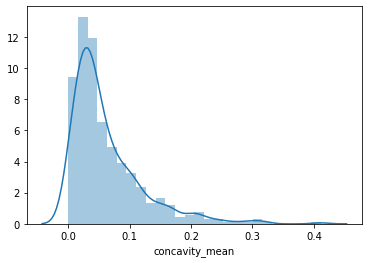

In [32]:
sns.distplot(data.concavity_mean)  #Plotting the distribution graph 
plt.show()

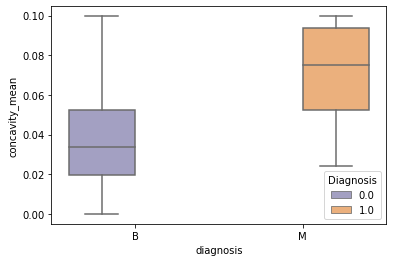

In [33]:
# Removing the outliers
data=data[data['concavity_mean']<=.1]
#data=data[data['concavity']>=8.0]
sns.boxplot(data.diagnosis,data.concavity_mean,hue=data.diagnosis,palette='tab20c_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

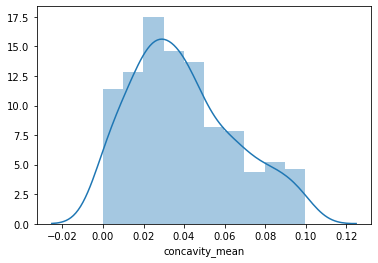

In [34]:
sns.distplot(data.concavity_mean)  #Plotting the distribution graph 
plt.show()

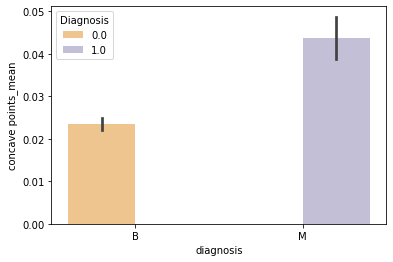

In [35]:
sns.barplot(data.diagnosis,data['concave points_mean'],hue=data.diagnosis,palette='PuOr')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

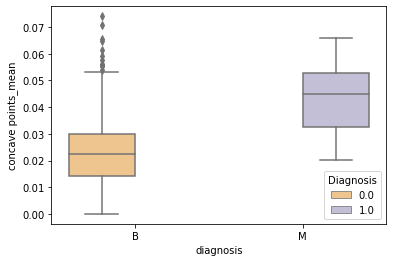

In [36]:
# Checking the outliers

sns.boxplot(data.diagnosis,data['concave points_mean'],hue=data.diagnosis,palette='PuOr')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

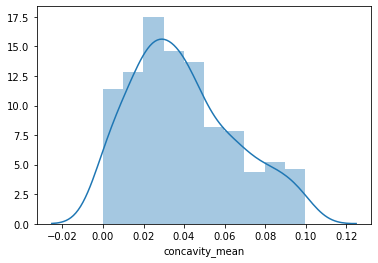

In [37]:
sns.distplot(data.concavity_mean) #Plotting the distribution graph 
plt.show()

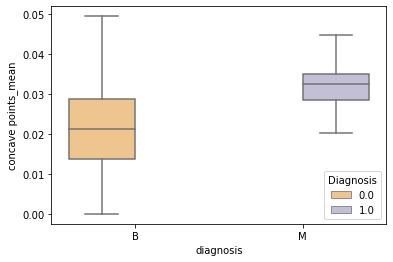

In [38]:
# removing the outliers
data=data[data['concave points_mean']<=.05]
sns.boxplot(data.diagnosis,data['concave points_mean'],hue=data.diagnosis,palette='PuOr')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

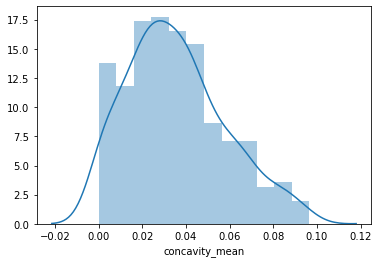

In [39]:
sns.distplot(data.concavity_mean) #Plotting the distribution graph 
plt.show()

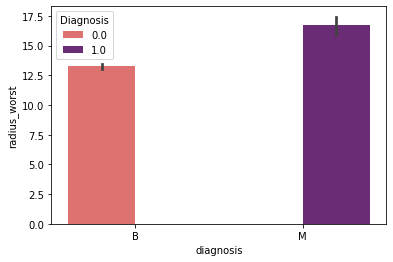

In [40]:
sns.barplot(data.diagnosis,data['radius_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

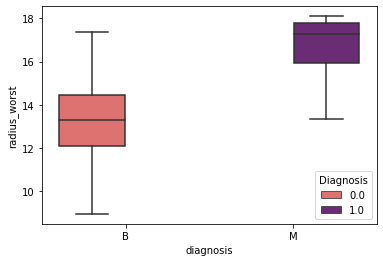

In [41]:
# checking the outliers 
sns.boxplot(data.diagnosis,data['radius_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

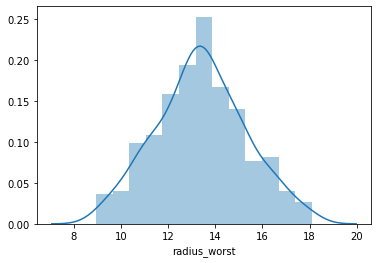

In [42]:
sns.distplot(data['radius_worst'])  #Plotting the distribution graph 
plt.show()

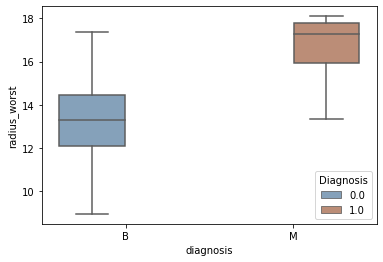

In [43]:
# removing the outliers
data=data[data['radius_worst']<=22]
sns.boxplot(data.diagnosis,data['radius_worst'],hue=data.diagnosis,palette='twilight_shifted')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

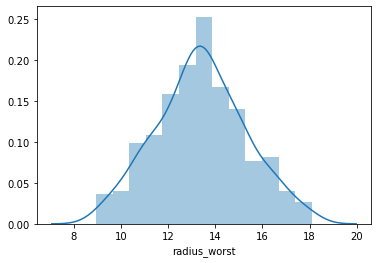

In [44]:
sns.distplot(data['radius_worst'])  #Plotting the distribution graph 
plt.show()

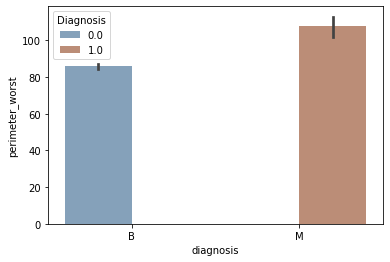

In [45]:
sns.barplot(data.diagnosis,data['perimeter_worst'],hue=data.diagnosis,palette='twilight_shifted')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

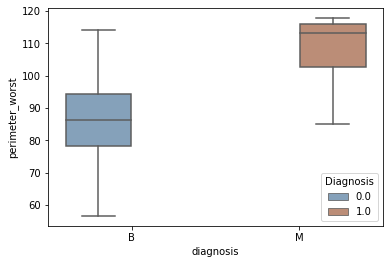

In [46]:
 # Checking the outliers 
sns.boxplot(data.diagnosis,data['perimeter_worst'],hue=data.diagnosis,palette='twilight_shifted')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

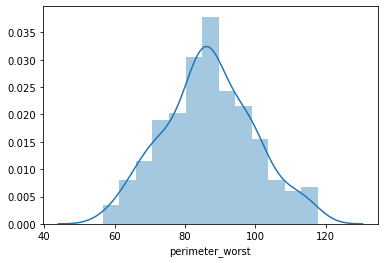

In [47]:
sns.distplot(data['perimeter_worst'])  #Plotting the distribution graph 
plt.show()

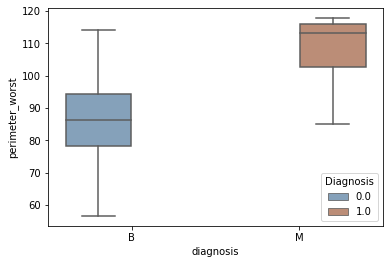

In [48]:
# Removing the outliers 
data=data[data['perimeter_worst']<=145]
sns.boxplot(data.diagnosis,data['perimeter_worst'],hue=data.diagnosis,palette='twilight_shifted')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

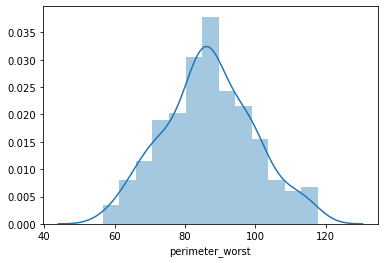

In [49]:
sns.distplot(data['perimeter_worst'])  #Plotting the distribution graph 
plt.show()

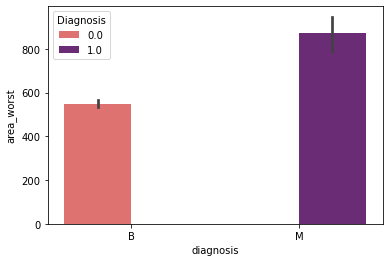

In [50]:
sns.barplot(data.diagnosis,data['area_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

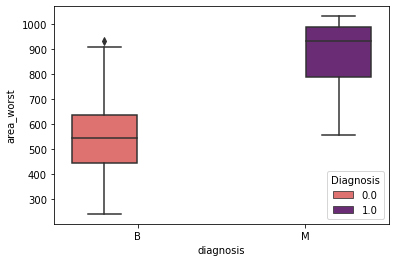

In [51]:
 # checking the otliers
sns.boxplot(data.diagnosis,data['area_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

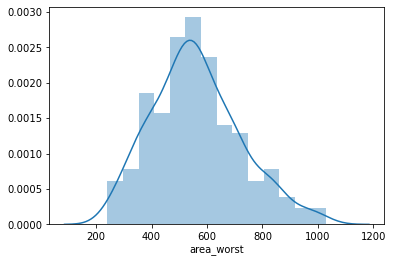

In [52]:
sns.distplot(data['area_worst'])  # #Plotting the distribution graph 

plt.show()

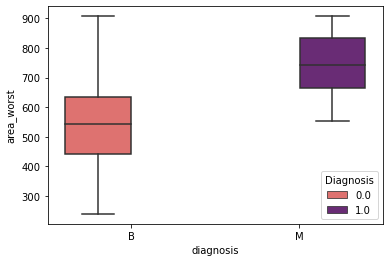

In [53]:
# Removing theoutliers
data=data[data['area_worst']<=920]

sns.boxplot(data.diagnosis,data['area_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

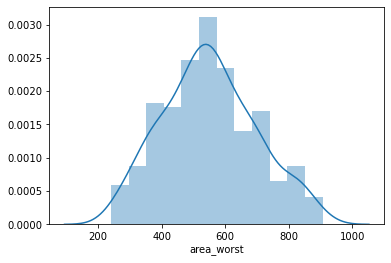

In [54]:
sns.distplot(data['area_worst']) #Plotting the distribution graph 
plt.show()

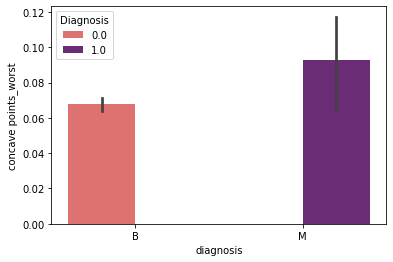

In [55]:
sns.barplot(data.diagnosis,data['concave points_worst'],hue=data.diagnosis,palette='magma_r')
plt.xticks([0.0,1.0],['B',"M"])
plt.legend(title='Diagnosis')
plt.show()

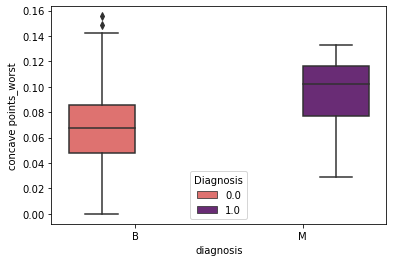

In [56]:
# Checking the outliers
sns.boxplot(data.diagnosis,data['concave points_worst'],hue=data.diagnosis,palette='magma_r')
plt.xticks([0.0,1.0],['B',"M"])
plt.legend(title='Diagnosis')
plt.show()

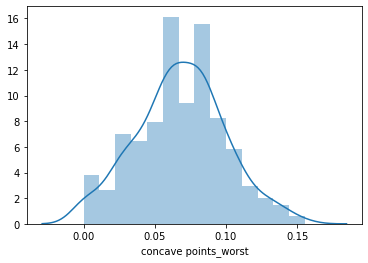

In [57]:
sns.distplot(data['concave points_worst']) #Plotting the distribution graph 
plt.show()

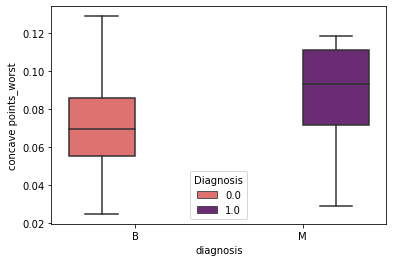

In [58]:
# Removing the outliers
data=data[data['concave points_worst']<=0.13]
data=data[data['concave points_worst']>=0.025]
sns.boxplot(data.diagnosis,data['concave points_worst'],hue=data.diagnosis,palette='magma_r')
plt.legend(title='Diagnosis')
plt.xticks([0.0,1.0],['B',"M"])
plt.show()

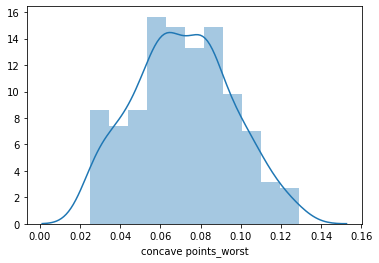

In [59]:
sns.distplot(data['concave points_worst']) #Plotting the distribution graph 
plt.show()

# Build a correlation matrix to identify relevant variables ( Graph )

In [60]:
data.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
diagnosis,1.000000,0.110427,0.107764,0.120746,0.041961,0.122972,0.145215,0.126383,0.161906,0.077265
radius_mean,0.110427,1.000000,0.997759,0.996346,0.040851,0.309301,0.964235,0.955677,0.956847,0.309992
perimeter_mean,0.107764,0.997759,1.000000,0.993411,0.092659,0.348804,0.963248,0.960997,0.955479,0.343543
area_mean,0.120746,0.996346,0.993411,1.000000,0.040151,0.299403,0.963360,0.953882,0.962903,0.297155
concavity_mean,0.041961,0.040851,0.092659,0.040151,1.000000,0.648286,0.063123,0.134146,0.069353,0.582191
concave points_mean,0.122972,0.309301,0.348804,0.299403,0.648286,1.000000,0.318124,0.358132,0.311377,0.753597
radius_worst,0.145215,0.964235,0.963248,0.963360,0.063123,0.318124,1.000000,0.988817,0.995309,0.373047
perimeter_worst,0.126383,0.955677,0.960997,0.953882,0.134146,0.358132,0.988817,1.000000,0.983966,0.423407
area_worst,0.161906,0.956847,0.955479,0.962903,0.069353,0.311377,0.995309,0.983966,1.000000,0.366102
concave points_worst,0.077265,0.309992,0.343543,0.297155,0.582191,0.753597,0.373047,0.423407,0.366102,1.000000


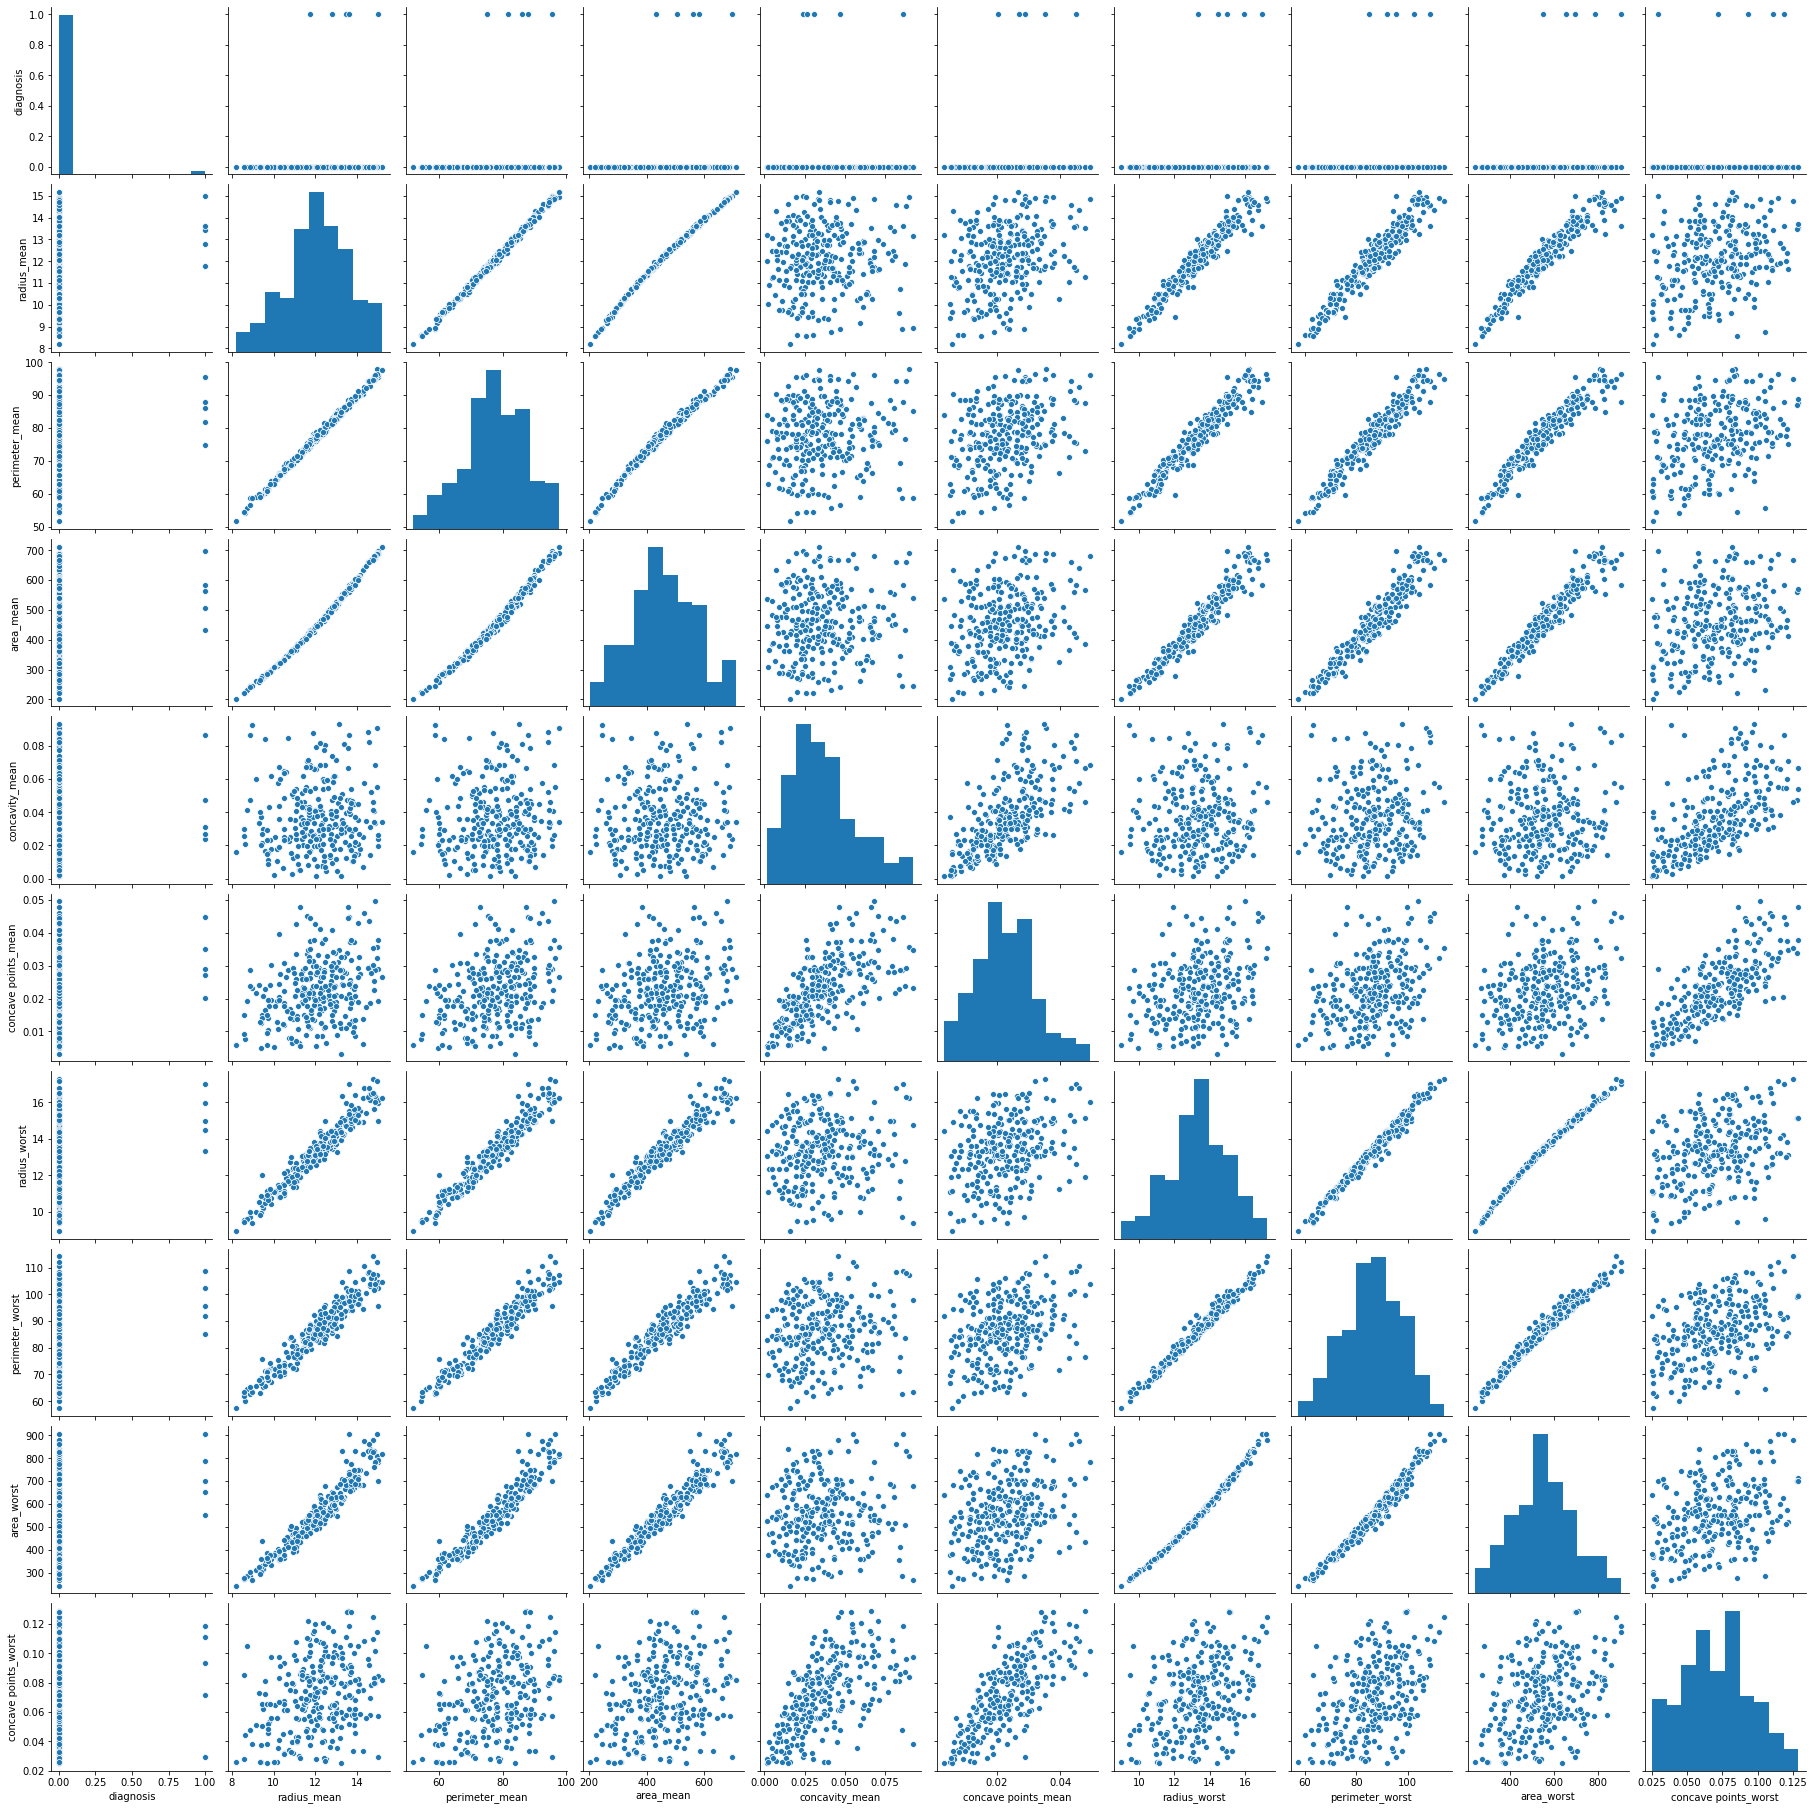

In [61]:
sns.pairplot(data)

In [62]:
data.drop(['concavity_mean','concave points_mean','concave points_worst'],inplace=True,axis=1)

In [63]:
corr=data.corr()
corr

,diagnosis,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,area_worst
diagnosis,1.000000,0.110427,0.107764,0.120746,0.145215,0.126383,0.161906
radius_mean,0.110427,1.000000,0.997759,0.996346,0.964235,0.955677,0.956847
perimeter_mean,0.107764,0.997759,1.000000,0.993411,0.963248,0.960997,0.955479
area_mean,0.120746,0.996346,0.993411,1.000000,0.963360,0.953882,0.962903
radius_worst,0.145215,0.964235,0.963248,0.963360,1.000000,0.988817,0.995309
perimeter_worst,0.126383,0.955677,0.960997,0.953882,0.988817,1.000000,0.983966
area_worst,0.161906,0.956847,0.955479,0.962903,0.995309,0.983966,1.000000


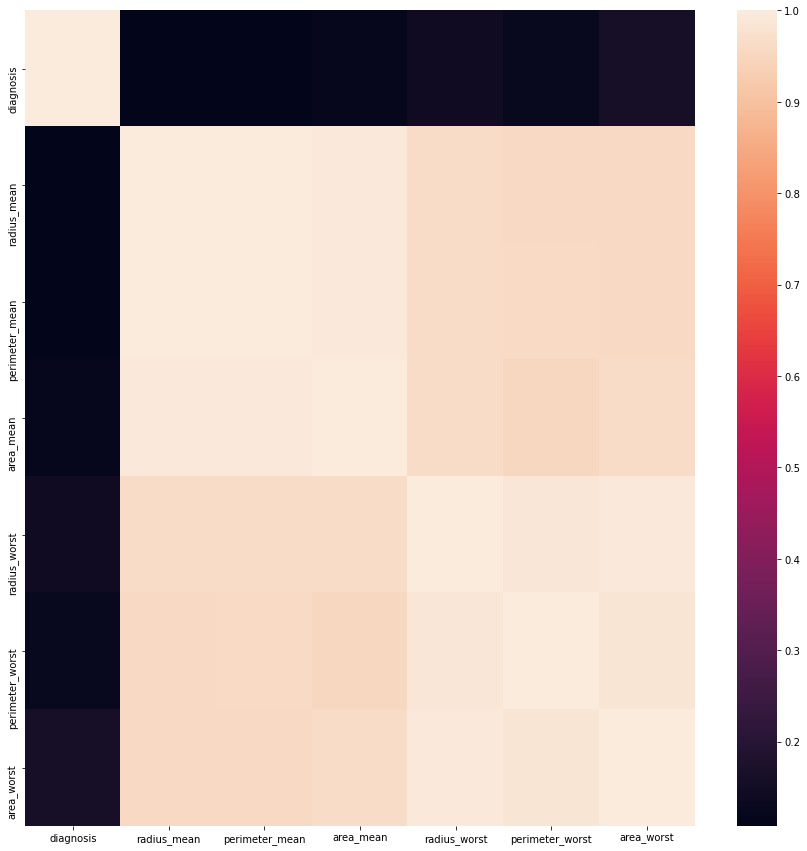

In [64]:
# graphically plotting correlation
plt.subplots(figsize=(15,15))
sns.heatmap(corr)

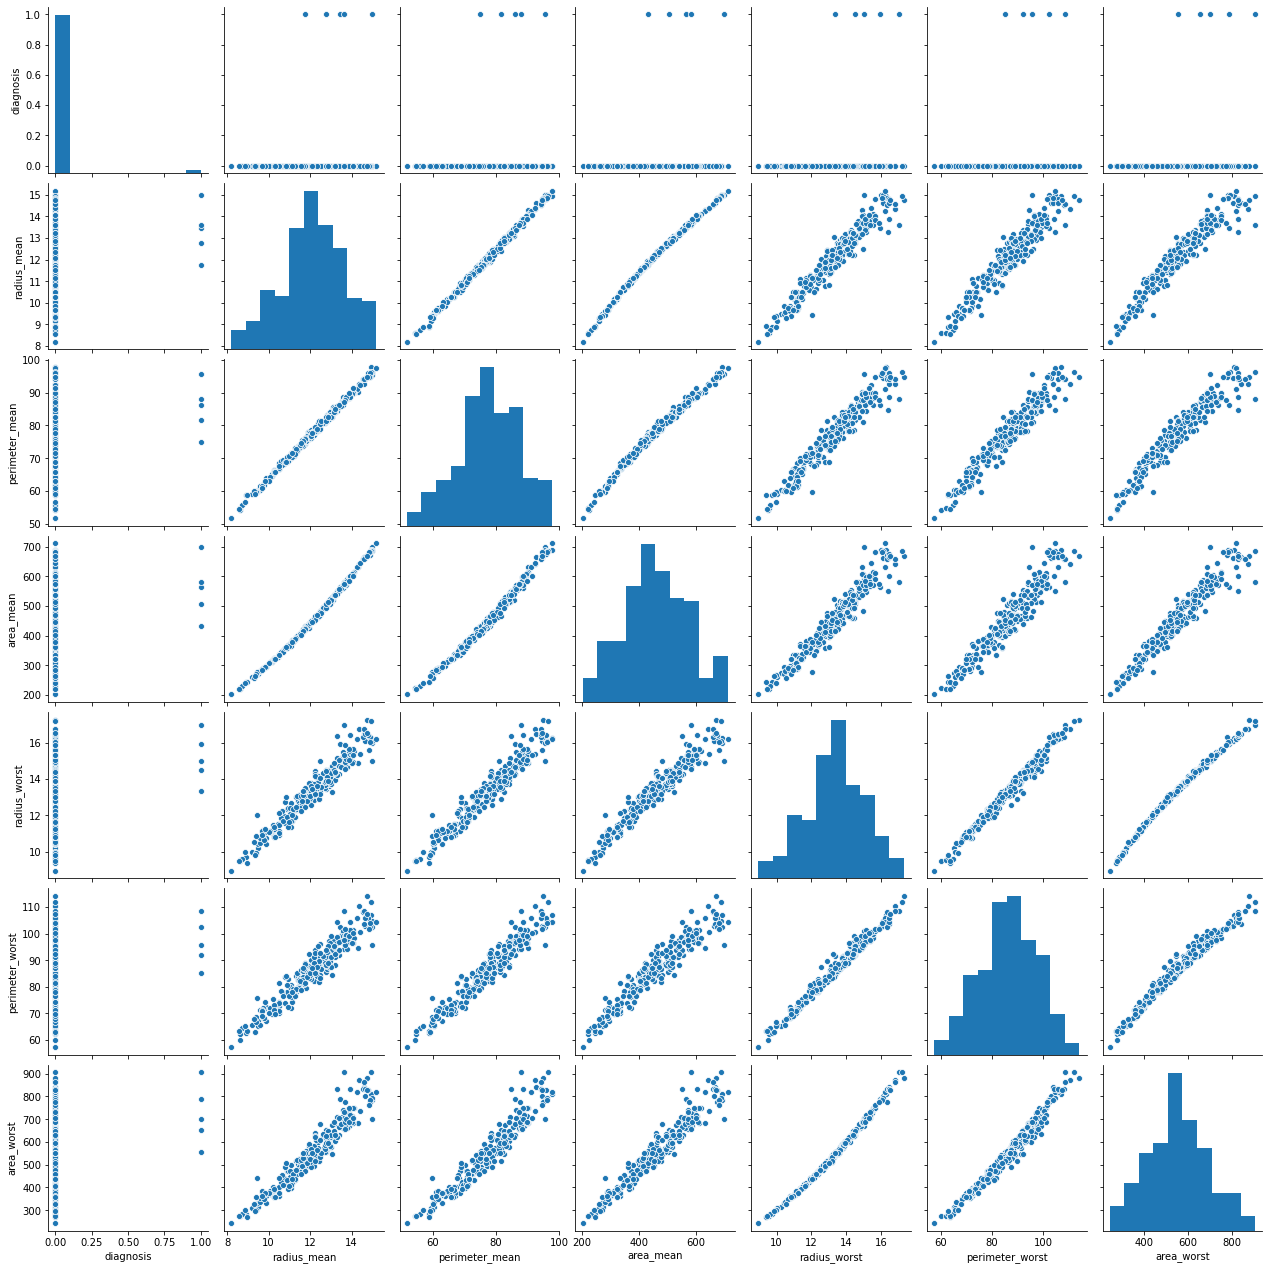

In [65]:
sns.pairplot(data)